In [5]:
import pandas as pd

In [6]:
hr_df = pd.read_csv('./data/HR_comma_sep.csv')

In [7]:
hr_df.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [8]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Satisfaction Level Vs Left

In [11]:
import matplotlib.pyplot as plt
import seaborn as sn

In [13]:
left = hr_df[hr_df.left == 1]
not_left = hr_df[hr_df.left == 0]

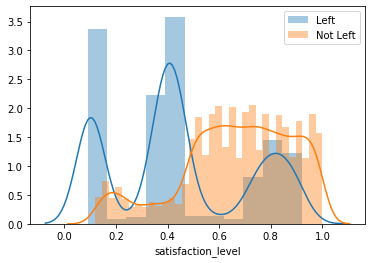

In [14]:
sn.distplot( left['satisfaction_level'], label = 'Left')
sn.distplot( not_left['satisfaction_level'], label = 'Not Left')
plt.legend();

### Last Evaluation Vs Left

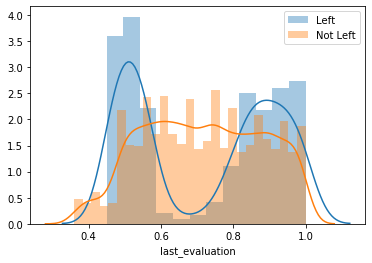

In [15]:
sn.distplot( left['last_evaluation'], label = 'Left')
sn.distplot( not_left['last_evaluation'], label = 'Not Left')
plt.legend();

In [19]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

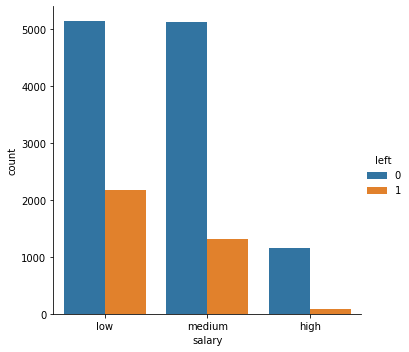

In [20]:
sn.catplot( data = hr_df,
            x = 'salary',
            hue = 'left',
            kind = 'count' );

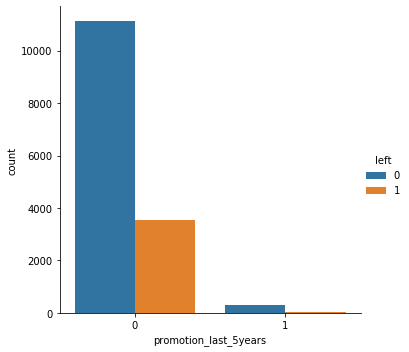

In [21]:
sn.catplot( data = hr_df,
            x = 'promotion_last_5years',
            hue = 'left',
            kind = 'count' );

### Time Spend Company Vs Left

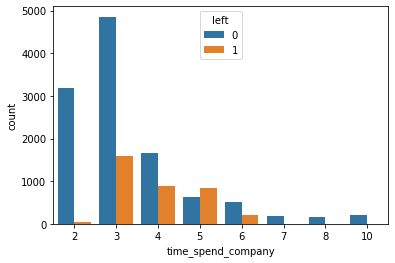

In [16]:
sn.countplot( data = hr_df,
              x = 'time_spend_company',
              hue = 'left' );

In [18]:
pd.crosstab( hr_df.time_spend_company, 
             hr_df.left,
             normalize = 'index')

left,0,1
time_spend_company,,
2,0.983662,0.016338
3,0.753841,0.246159
4,0.651936,0.348064
5,0.434487,0.565513
6,0.708914,0.291086
7,1.000000,0.000000
8,1.000000,0.000000
10,1.000000,0.000000


In [ ]:
hr_df.head(5)

In [ ]:
hr_df.sales.unique()

### Encoding Categorical Features

In [22]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['sales', 'salary'] )

In [24]:
hr_encoded_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Setting X and Y Variables

In [29]:
X_features = list(hr_encoded_df.columns)

In [30]:
X_features.remove('left')

In [31]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [41]:
X[0:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [38]:
X_train.shape

(11999, 20)

In [39]:
X_test.shape

(3000, 20)

### Build a Model: V1

Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg_v1 = LogisticRegression()

In [45]:
logreg_v1.fit( X_train, y_train )

/Users/manaranjan/anaconda/envs/mltraining/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
logreg_v1.intercept_

array([-0.42143595])

In [48]:
logreg_v1.coef_

array([[-3.95885972,  0.71004683, -0.29473501,  0.00446403,  0.26645583,
        -1.50873427, -1.27783392, -0.11072187, -0.4936364 ,  0.13026164,
         0.32806505, -0.42339866,  0.02121058, -0.09448163,  0.0286274 ,
         0.07414746,  0.11849046, -1.20286744,  0.66494485,  0.11648663]])

In [ ]:
dict( zip( X_features, logreg_v1.coef_[0] ) )

### Predict on Test Set

- p(y) >= 0.5,  y = 1
- p(y) < 0.5, y = 0

In [73]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [74]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

### Evaluating the model

In [61]:
from sklearn.metrics import confusion_matrix

In [87]:
cm_v1 = confusion_matrix( y_logreg_v1.actual, 
                          y_logreg_v1.predicted,
                          [1,0] )

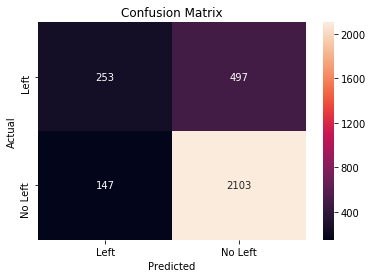

In [88]:
sn.heatmap( cm_v1, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [89]:
(253/(253+497)) # Recall

0.3373333333333333

In [90]:
(253/(253+147)) # Precision

0.6325

In [91]:
from sklearn.metrics import classification_report

In [92]:
print( classification_report( y_logreg_v1.actual,
                              y_logreg_v1.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2250
           1       0.63      0.34      0.44       750

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.65      3000
weighted avg       0.76      0.79      0.76      3000



### Building a Decision Tree Model

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
tree_v2 = DecisionTreeClassifier( max_depth = 5 )
### Max Depth is called hyperparameter

In [96]:
tree_v2.fit( X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
y_tree_pred = tree_v2.predict( X_test )

In [98]:
cm_tree_v2 = confusion_matrix( y_test,
                               y_tree_pred,
                               [1,0] )

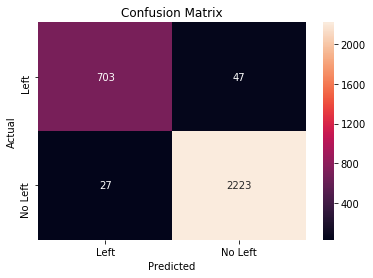

In [99]:
sn.heatmap( cm_tree_v2, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [101]:
print( classification_report( y_test,
                       y_tree_pred ) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2250
           1       0.96      0.94      0.95       750

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



### Visualizing Decision Tree

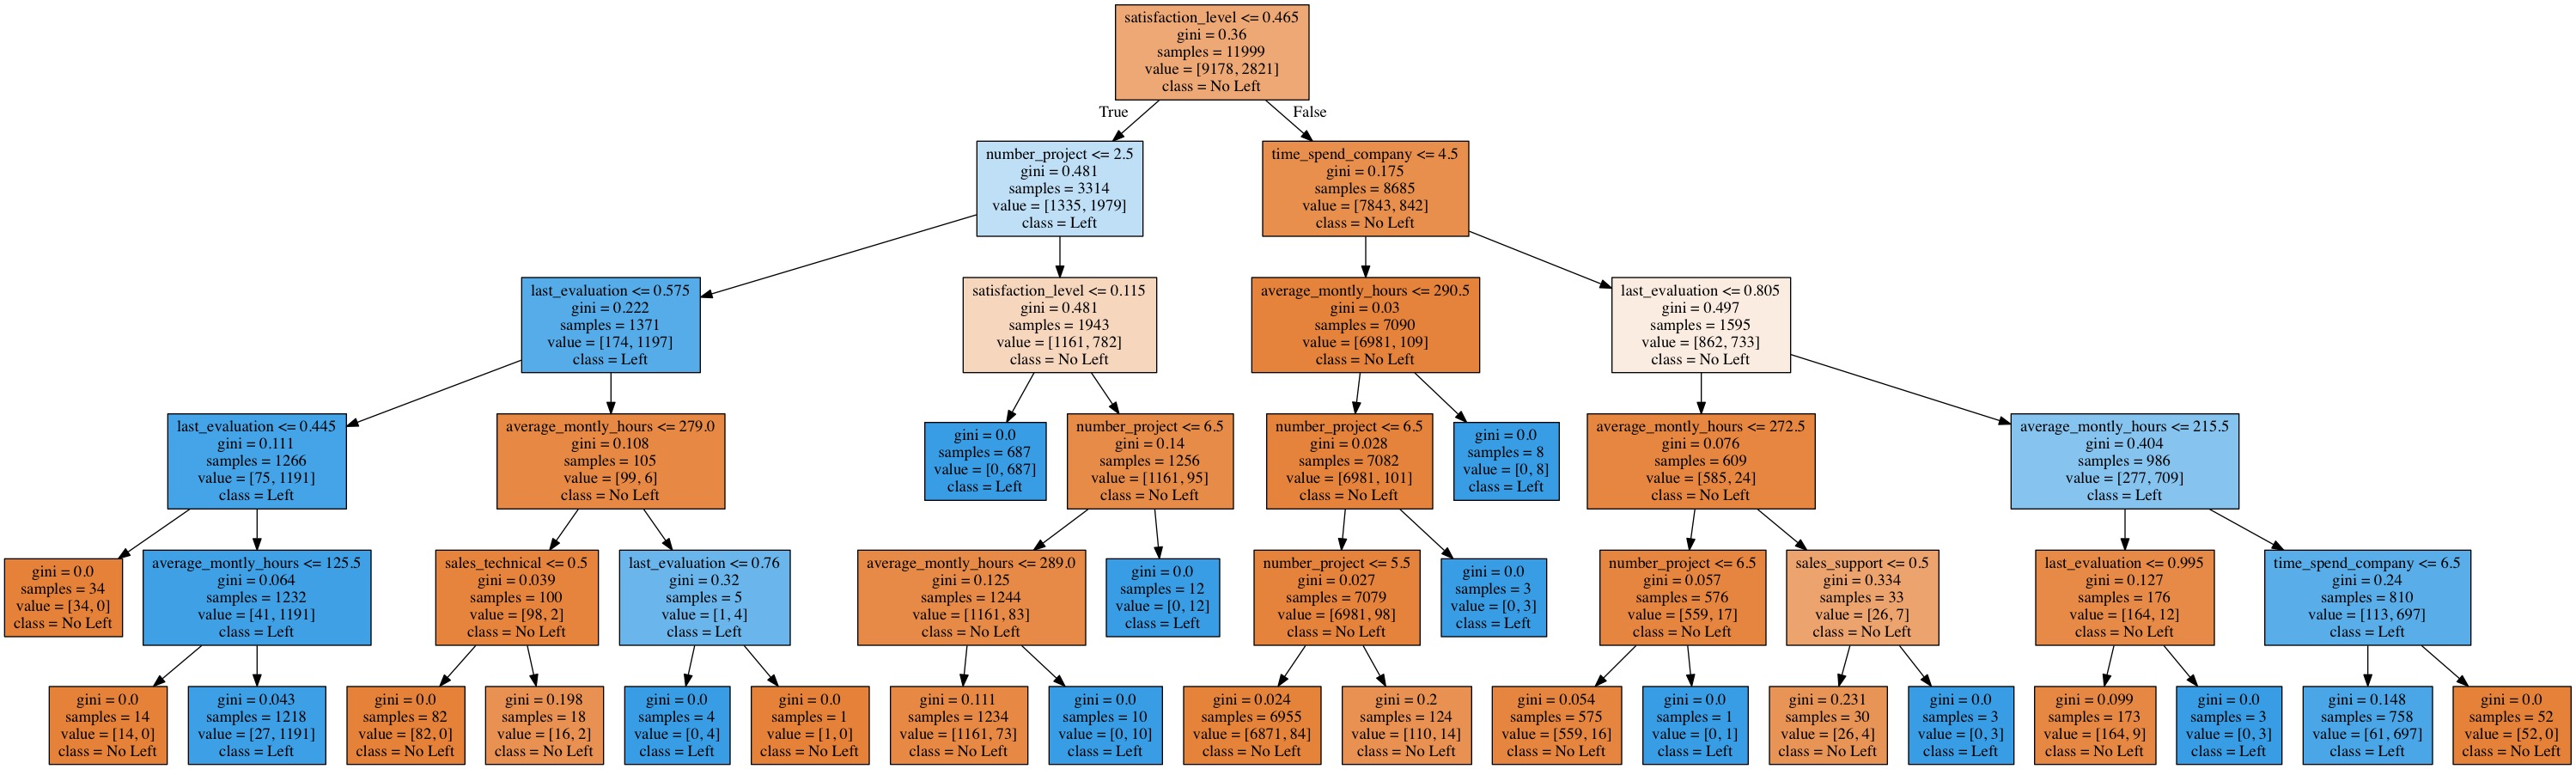

In [127]:
from sklearn.tree import export_graphviz

export_graphviz( tree_v2,
                 out_file = 'tree.model',
                 feature_names = X_features,
                 class_names = ['No Left', 'Left'],
                 filled = True )

import pydotplus as pdot

tree_graph = pdot.graph_from_dot_file( 'tree.model' )

tree_graph.write_jpeg( "tree.jpeg" )

from IPython import display

display.Image( "tree.jpeg" )

### Grid Search

In [109]:
from sklearn.model_selection import GridSearchCV

In [129]:
DecisionTreeClassifier?

In [131]:
params = { "max_depth": range(3,10),
           "criterion": ['gini', 'entropy'] }

In [133]:
grid_v3 = GridSearchCV( DecisionTreeClassifier(),
                        param_grid = params,
                        cv = 10,
                        scoring = 'f1' )

In [134]:
grid_v3.fit( X_train, y_train )

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10)},
             pre_dispat

In [135]:
grid_v3.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [136]:
grid_v3.best_score_

0.9561733519064053

In [137]:
grid_v3.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')